<a href="https://colab.research.google.com/github/thomasamged/new/blob/main/brain_tumor_classification_vgg16_augmented_mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 86% 13.0M/15.1M [00:00<00:00, 135MB/s]
100% 15.1M/15.1M [00:00<00:00, 147MB/s]


In [1]:
"!unzip brain-mri-images-for-brain-tumor-detection.zip"

unzip:  cannot find or open brain-mri-images-for-brain-tumor-detection.zip, brain-mri-images-for-brain-tumor-detection.zip.zip or brain-mri-images-for-brain-tumor-detection.zip.ZIP.


In [3]:
"pip install streamlit"

'pip install streamlit'

In [5]:
import numpy as np # Numerical operations
import pandas as pd # Handling Data

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import os # System-level operations

import keras

from tensorflow.keras.preprocessing.image import * # Image preprocessing

# Building and training neural networks
from keras.models import *
from keras.layers import *
from keras.applications import VGG16
from keras import optimizers
import streamlit as st
from PIL import Image


# EDA

**Importing the data**

In [ ]:
no_data = '/content/no'
yes_data = '/content/yes'

counts = {
    'Tumor': len(os.listdir(yes_data)),
    'No Tumor': len(os.listdir(no_data))
}

**Visulalisation of the data**

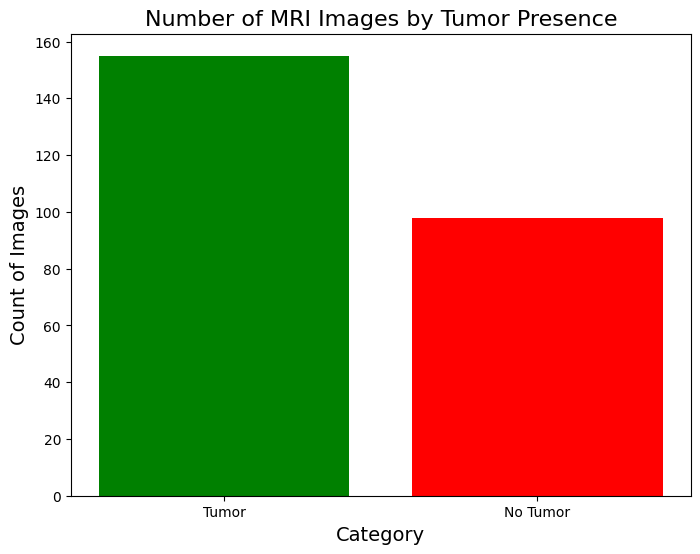

In [ ]:
counts_df = pd.DataFrame(list(counts.items()), columns=['Category', 'Count'])

plt.figure(figsize=(8, 6))
plt.bar(counts_df['Category'], counts_df['Count'], color=['green', 'red'])
plt.title('Number of MRI Images by Tumor Presence', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count of Images', fontsize=14)
plt.show()


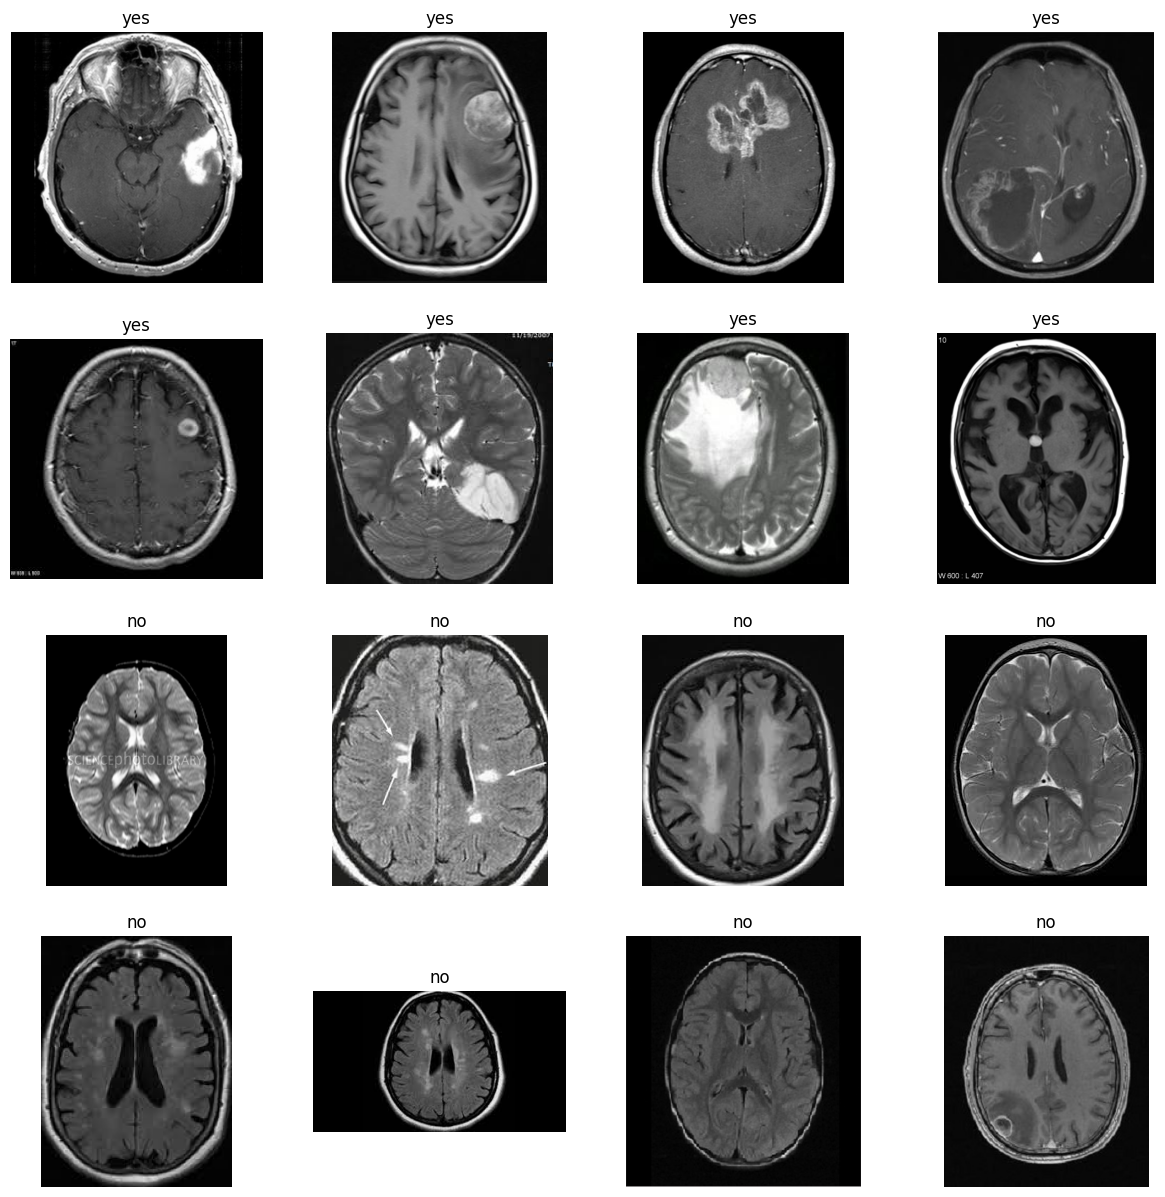

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(os.path.join(yes_data , os.listdir(yes_data)[i])))
    plt.axis("off")
    plt.title('yes')
for j in range(8):
    plt.subplot(4, 4, j+9)
    plt.imshow(load_img(os.path.join(no_data , os.listdir(no_data)[j])))
    plt.axis("off")
    plt.title('no')

In [6]:
BT_dst = '/content/brain_tumor_dataset'


In [53]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.3, 1.5],
                             validation_split=0.2
                            )

In [55]:
train_gen= datagen.flow_from_directory(BT_dst ,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='training',
                                       batch_size=32
                                      )

Found 203 images belonging to 2 classes.


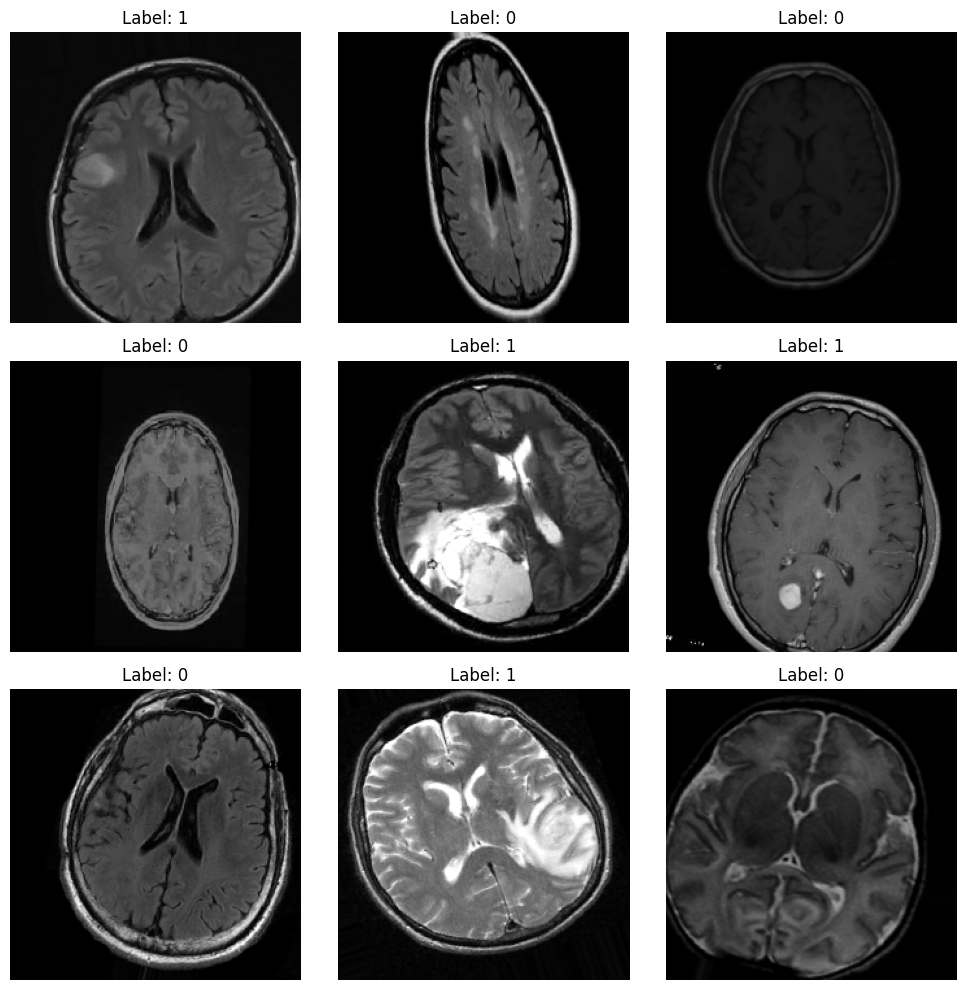

In [ ]:
num_images = 9

images, labels = next(train_gen)
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {int(labels[i])}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [56]:
val_gen = datagen.flow_from_directory( BT_dst ,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       subset='validation',
                                       batch_size=32
                                      )

Found 50 images belonging to 2 classes.


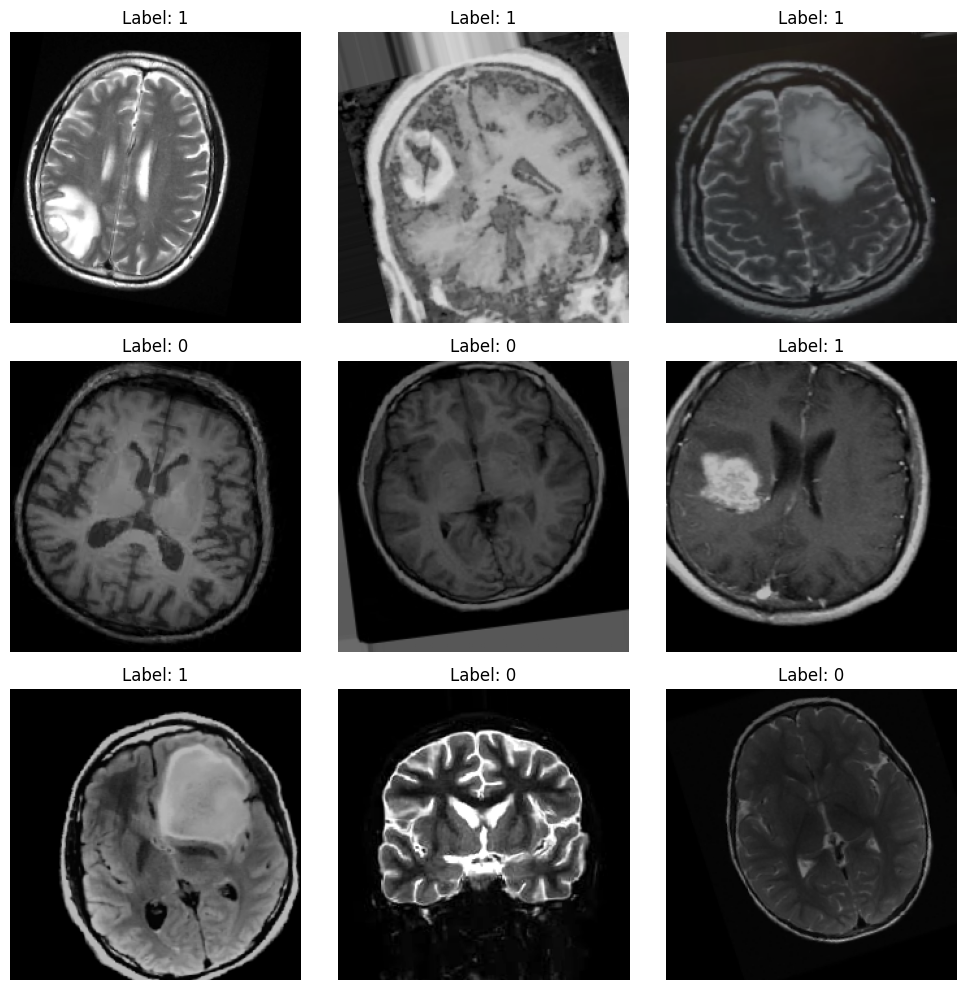

In [ ]:
num_images = 9

images, labels = next(val_gen)

plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {int(labels[i])}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6029 - loss: 0.7485 - val_accuracy: 0.6200 - val_loss: 0.6196
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.7424 - loss: 0.5722 - val_accuracy: 0.7400 - val_loss: 0.5347
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 273ms/step - accuracy: 0.7481 - loss: 0.5302 - val_accuracy: 0.7200 - val_loss: 0.5367
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.7865 - loss: 0.4443 - val_accuracy: 0.7400 - val_loss: 0.5011
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.8111 - loss: 0.4144 - val_accuracy: 0.7400 - val_loss: 0.5432
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step - accuracy: 0.7822 - loss: 0.4435 - val_accuracy: 0.8000 - val_loss: 0.4305
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.8726 - loss: 0.3319 - val_accuracy: 0.8000 - val_loss: 0.4982
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.8979 - loss: 0.2816 - val_accuracy: 0.7800 - val_loss: 0

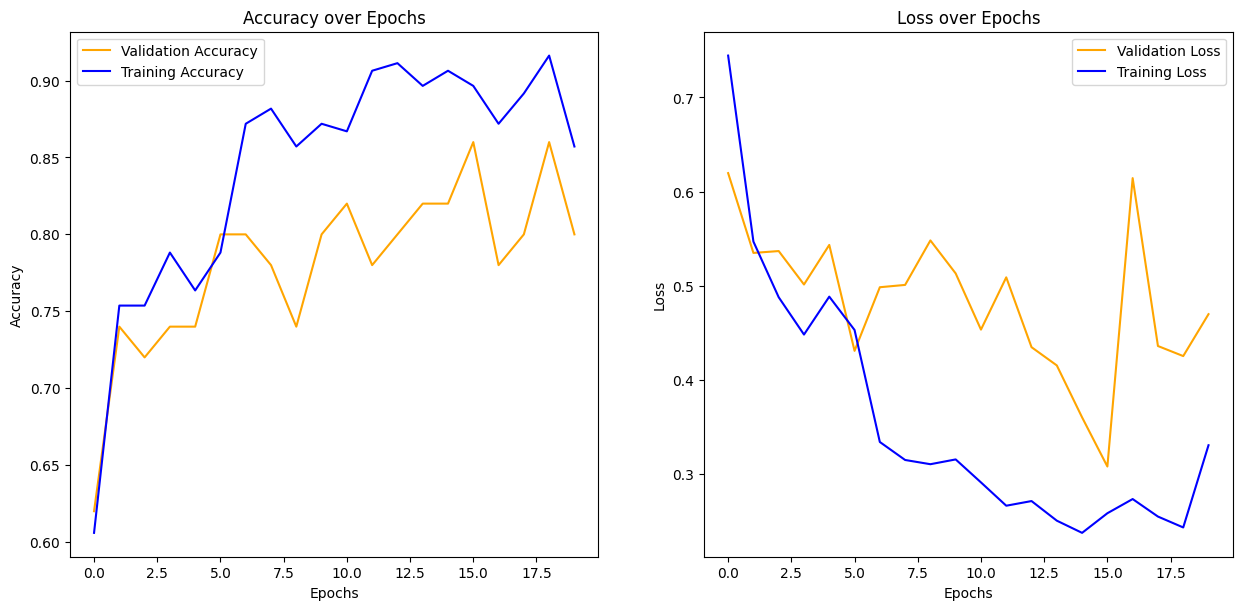

In [89]:
VGG = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

for layer in VGG.layers:
        layer.trainable = False

img_input = Input(shape=(224, 224, 3))
x = img_input
x = VGG(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(img_input, x)

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=
              ['accuracy'])

history=model.fit(train_gen, epochs=20, batch_size=30, validation_data=val_gen)

plt.figure(figsize=(15, 15))

plt.subplot(2,2, 1)
sns.lineplot(data=history.history, x=range(20), y=history.history['val_accuracy'], label='Validation Accuracy', color='orange')
sns.lineplot(data=history.history, x=range(20), y=history.history['accuracy'], label='Training Accuracy', color='blue')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,2, 2)
sns.lineplot(data=history.history, x=range(20), y=history.history['val_loss'], label='Validation Loss', color='orange')
sns.lineplot(data=history.history, x=range(20), y=history.history['loss'], label='Training Loss', color='blue')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 884ms/step - accuracy: 0.8727 - loss: 0.2719 - val_accuracy: 0.8600 - val_loss: 0.3482
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 291ms/step - accuracy: 0.9180 - loss: 0.2053 - val_accuracy: 0.8400 - val_loss: 0.4567
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.9342 - loss: 0.1777 - val_accuracy: 0.8000 - val_loss: 0.4668
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - accuracy: 0.9441 - loss: 0.1609 - val_accuracy: 0.8400 - val_loss: 0.3728
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.9260 - loss: 0.1897 - val_accuracy: 0.8200 - val_loss: 0.4310
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - accuracy: 0.9540 - loss: 0.1430 - val_accuracy: 0.7800 - val_loss: 0.5122
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.9602 - loss: 0.1609 - val_accuracy: 0.8400 - val_loss: 0.3215
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.9607 - loss: 0.1250 - val_accuracy: 0.8400 - val_los

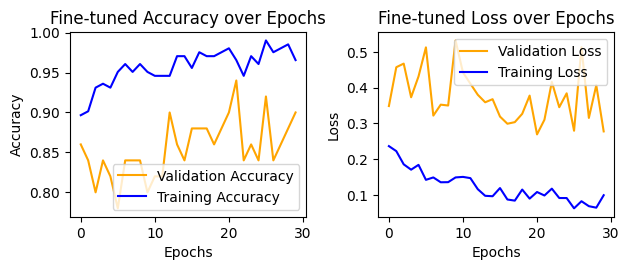

In [90]:
VGG.trainable = True
set_trainable = False

for layer in VGG.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-5),
    loss = 'binary_crossentropy',
    metrics= ['accuracy']
)

history = model.fit(
    train_gen,
    batch_size = 20,
    epochs = 30,
    validation_data = val_gen
)

plt.subplot(2,2, 3)
sns.lineplot(data=history.history, x=range(30), y=history.history['val_accuracy'], label='Validation Accuracy', color='orange')
sns.lineplot(data=history.history, x=range(30), y=history.history['accuracy'], label='Training Accuracy', color='blue')
plt.title("Fine-tuned Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,2, 4)
sns.lineplot(data=history.history, x=range(30), y=history.history['val_loss'], label='Validation Loss', color='orange')
sns.lineplot(data=history.history, x=range(30), y=history.history['loss'], label='Training Loss', color='blue')
plt.title("Fine-tuned Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()
plt.show()

In [91]:
keras.saving.save_model(model,"tumor.keras")

In [95]:
!wget -q -O - ipv4.icanhazip.com

34.125.45.145


In [110]:
%%writefile app.py
import streamlit as st
from PIL import Image
import keras
import numpy as np
import pandas as pd
from tensorflow import *
model=keras.models.load_model('/content/tumor.keras')
def preprocess_image(image):
    image = image.convert('RGB')
    image = image.resize((224, 224))
    image_array = np.array(image) / 255.0
    return image_array

def predict(image):
    image_array = preprocess_image(image)
    image_array = np.expand_dims(image_array, axis=0)
    prediction=model.predict(image_array)
    if prediction[0][0] < 0.5:
        return "No tumor"
    return "tumor"

st.title("Tumor Prediction App")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")
    st.write("Classifying...")
    prediction = predict(image)
    st.write(f"Prediction : {prediction}")

Overwriting app.py


In [111]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.45.145:8501

your url is: https://smart-jeans-thank.loca.lt
2024-10-24 09:38:19.092093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 09:38:19.132273: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 09:38:19.143921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 09:38:20.827201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:172976